Dependencies: graph_stuff.py, numpy, networkx, pygraphviz

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz
import graph_stuff
import numpy as np

In [119]:
token = None #put ADS token here

In [121]:
def get_cmst(start_bibcode):
    cgraph = graph_stuff.build_citation_graph(start_bibcode, token, depth=3)
    cmst = nx.algorithms.maximum_spanning_tree(cgraph)
    return cmst

def make_plot(cmst, savename=None):
    pubdates = np.asarray(list(nx.get_node_attributes(cmst, 'pubdate').values()))
    minpubdate = pubdates.min()
    maxpubdate = pubdates.max()
    def normalize(x):
        return (x - maxpubdate) / (maxpubdate - minpubdate)
    plt.figure(figsize=[16, 16])
    pos = nx.nx_agraph.graphviz_layout(cmst, prog='twopi', args='')
    plt.figure(figsize=(8, 8))
    nx.draw(cmst, pos, node_size=20, node_color=pubdates, 
            alpha=0.5, with_labels=False, cmap='rainbow')
    plt.axis('equal')
    if savename is not None:
        plt.savefig(savename)

<Figure size 1152x1152 with 0 Axes>

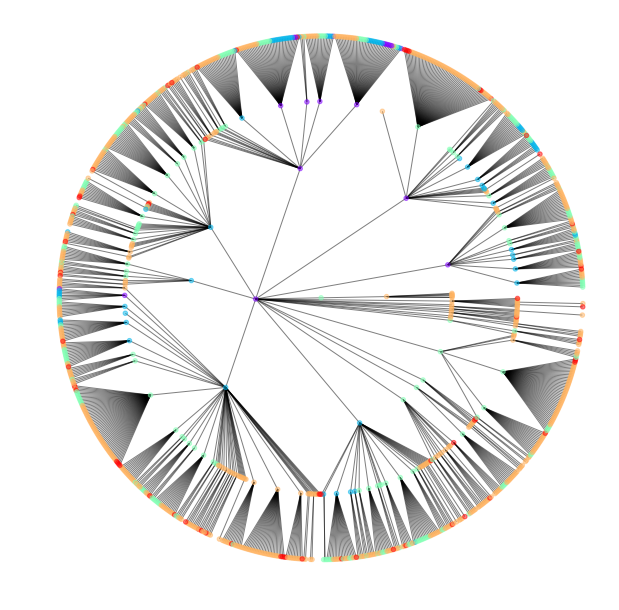

In [124]:
cmst = get_cmst('2015ApJ...811...78T')
make_plot(cmst, savename='eg.png')